## Imports & Setup

In [1]:
# Import base Libraries
import pandas as pd
# import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
%matplotlib inline
register_matplotlib_converters()

In [2]:
# add the scripts directory to the python path,
# or the set of places the python interpreter looks for code files
import sys
sys.path.insert(0, './ds_helpers')

# now read in the functions
from helpers import read_in_dataset, merge_dataset

In [3]:
# Set path to dataset
dataset_folder = '../datasets/zillow/'

In [4]:
# List files in dataset
!ls ../datasets/zillow/

properties_2016.csv
properties_2017.csv
sample_submission.csv
train_2016.csv
train_2017.csv
train_data_merged_2016.csv
train_data_merged_2016.p
zillow_data_dictionary.xlsx


In [5]:
df_train_merged = read_in_dataset(dataset_folder,"train_data_merged_2016.csv",True)

------------------------------------------

Reading in the train_data_merged_2016.csv dataset:

------------------------------------------

it has 90275 rows and 60 columns

------------------------------------------

It has the following columns: 

Index(['parcelid', 'logerror', 'transactiondate', 'airconditioningtypeid',
       'architecturalstyletypeid', 'basementsqft', 'bathroomcnt', 'bedroomcnt',
       'buildingclasstypeid', 'buildingqualitytypeid', 'calculatedbathnbr',
       'decktypeid', 'finishedfloor1squarefeet',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12',
       'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50',
       'finishedsquarefeet6', 'fips', 'fireplacecnt', 'fullbathcnt',
       'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'prope

## EDA

In [6]:
df_train_merged.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


In [7]:
df_train_merged.shape

(90275, 60)

## Explore transaction dates

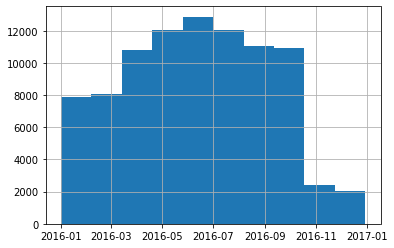

In [9]:
pd.to_datetime(df_train_merged.transactiondate).hist()

Above: as stated data near and after nov is with held in testing set

https://www.kaggle.com/c/zillow-prize-1

In [11]:
pd.to_datetime(df_train_merged.transactiondate).min()

Timestamp('2016-01-01 00:00:00')

In [12]:
pd.to_datetime(df_train_merged.transactiondate).max()

Timestamp('2016-12-30 00:00:00')